# Eco Benchmark result data vizualization

## Data importation and preparation


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data_filename='20220628-193500.csv'

In [3]:
df = pd.read_csv ('results/'+data_filename)

In [4]:
df["testcase"] = df["service"] + '-' + df["use_case"]

In [5]:
df["ram"] = df["application_ram_avg"] + df["database_ram_avg"]

In [6]:
df["cpu"] = df["application_cpu_avg"] + df["application_cpu_avg"]

In [7]:
df["wh_by_iteration"] = (((df["application_energy"] + df["database_energy"])/df["iterations"])/1000000)/3600 

In [8]:
df.head()

,service,use_case,run_id,valid,vus,iterations,http_reqs,checks_passes,checks_fails,application_ram_avg,...,application_energy,database_ram_avg,database_ram_median,database_cpu_avg,database_cpu_median,database_energy,testcase,ram,cpu,wh_by_iteration
0,go-pgx,aggregation-code-side,1656147109,True,20,503,348511,348511,0,1.449924e+08,...,1.878773e+11,3.377482e+08,369537024.0,0.140525,0.166764,3.879691e+10,go-pgx-aggregation-code-side,4.827406e+08,1.719226,0.125179
1,go-pgx,aggregation-code-side,1656147939,True,20,504,348156,348156,0,1.391549e+08,...,1.886653e+11,3.379178e+08,370954240.0,0.144225,0.170236,3.960074e+10,go-pgx-aggregation-code-side,4.770727e+08,1.703719,0.125808
2,go-pgx,aggregation-code-side,1656148762,True,20,508,347566,347566,0,1.377669e+08,...,1.869462e+11,3.374540e+08,370905088.0,0.142496,0.168407,3.947159e+10,go-pgx-aggregation-code-side,4.752209e+08,1.716637,0.123807
3,go-pgx,aggregation-code-side,1656149586,True,20,504,348469,348469,0,1.416682e+08,...,1.876511e+11,3.390575e+08,371628032.0,0.143651,0.168731,3.966546e+10,go-pgx-aggregation-code-side,4.807257e+08,1.725342,0.125285
4,go-pgx,aggregation-code-side,1656150410,True,20,504,348404,348404,0,1.463247e+08,...,1.880509e+11,3.368430e+08,369997824.0,0.139595,0.167274,4.018137e+10,go-pgx-aggregation-code-side,4.831677e+08,1.706895,0.125789


In [9]:
df.count()

service                   290
use_case                  290
run_id                    290
valid                     290
vus                       290
iterations                290
http_reqs                 290
checks_passes             290
checks_fails              290
application_ram_avg       290
application_ram_median    290
application_cpu_avg       290
application_cpu_median    290
application_energy        290
database_ram_avg          290
database_ram_median       290
database_cpu_avg          290
database_cpu_median       290
database_energy           290
testcase                  290
ram                       290
cpu                       290
wh_by_iteration           290
dtype: int64

## Energy consumption

The lower the better.

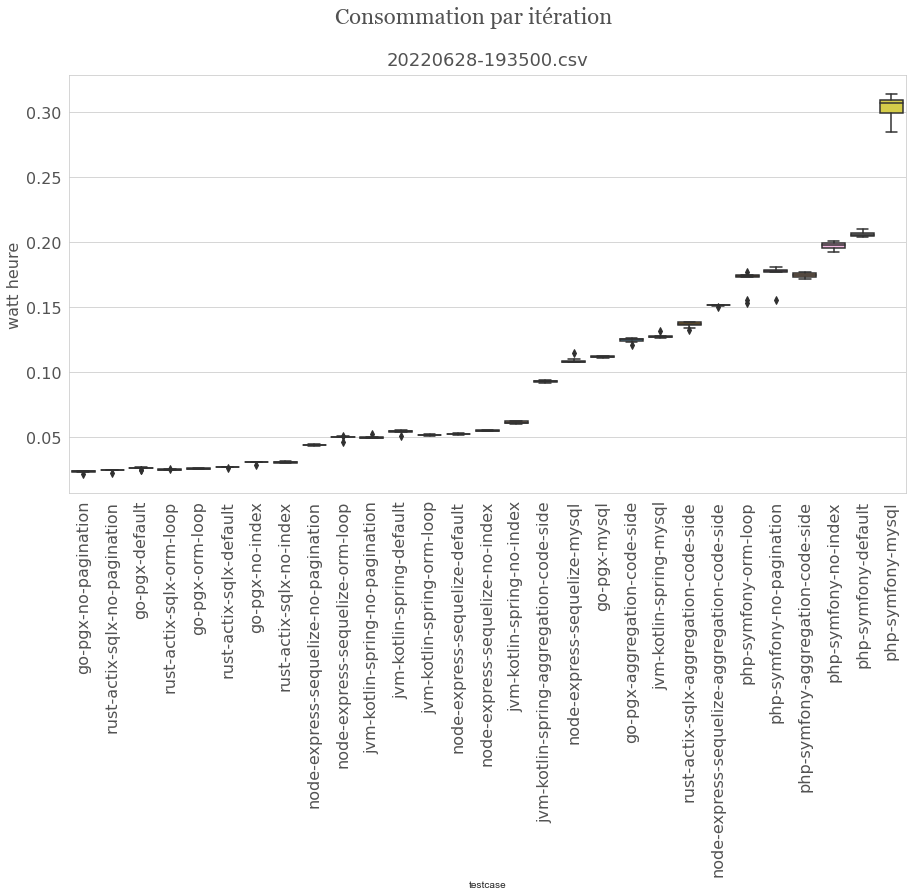

In [10]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(1,1,figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'wh_by_iteration',palette='colorblind',fliersize=5, data = df.sort_values(['wh_by_iteration'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('watt heure', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Consommation par itération'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)


filename = 'boxplot-wh-filtered'
plt.savefig(filename+'.png', facecolor=facecolor)

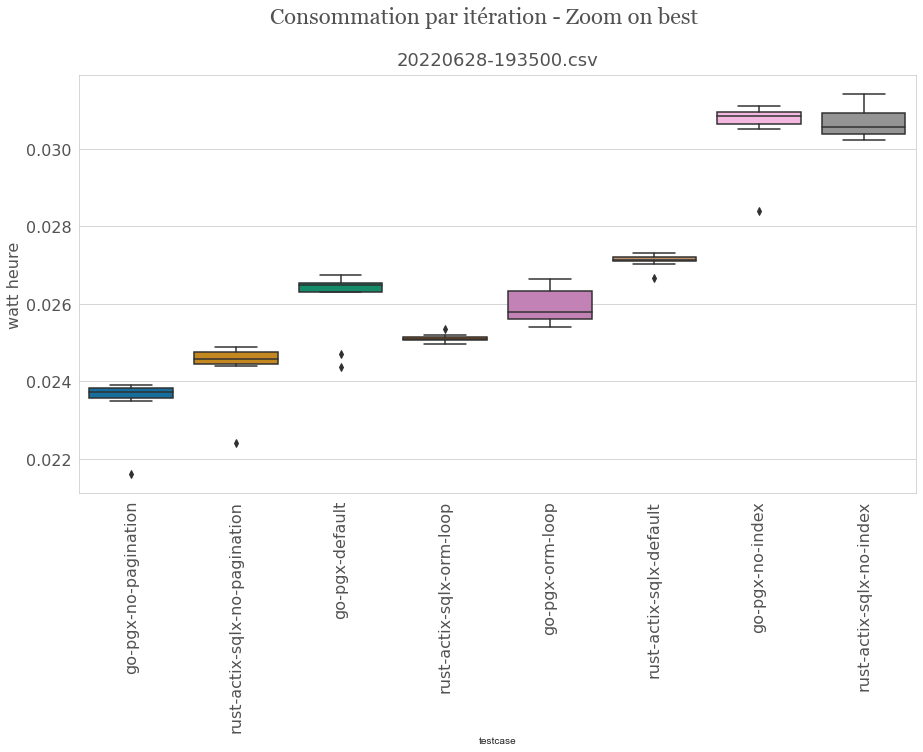

In [11]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'wh_by_iteration',palette='colorblind',fliersize=5, data = df[df['wh_by_iteration']<0.035].sort_values(['wh_by_iteration'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('watt heure', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Consommation par itération - Zoom on best'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'boxplot-zoom-best'
plt.savefig(filename+'.png', facecolor=facecolor)

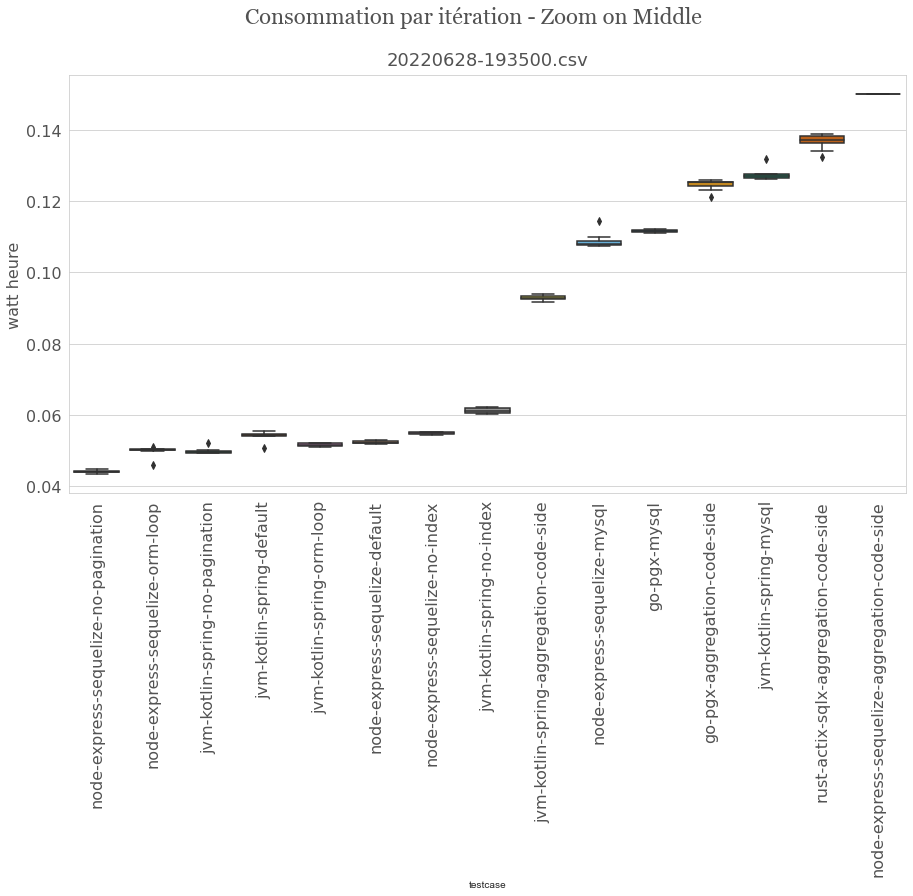

In [12]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'wh_by_iteration',palette='colorblind',fliersize=5, data = df[(df['wh_by_iteration']>0.035) & (df['wh_by_iteration']<0.150)].sort_values(['wh_by_iteration'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('watt heure', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Consommation par itération - Zoom on Middle'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'boxplot-zoom-best'
plt.savefig(filename+'.png', facecolor=facecolor)

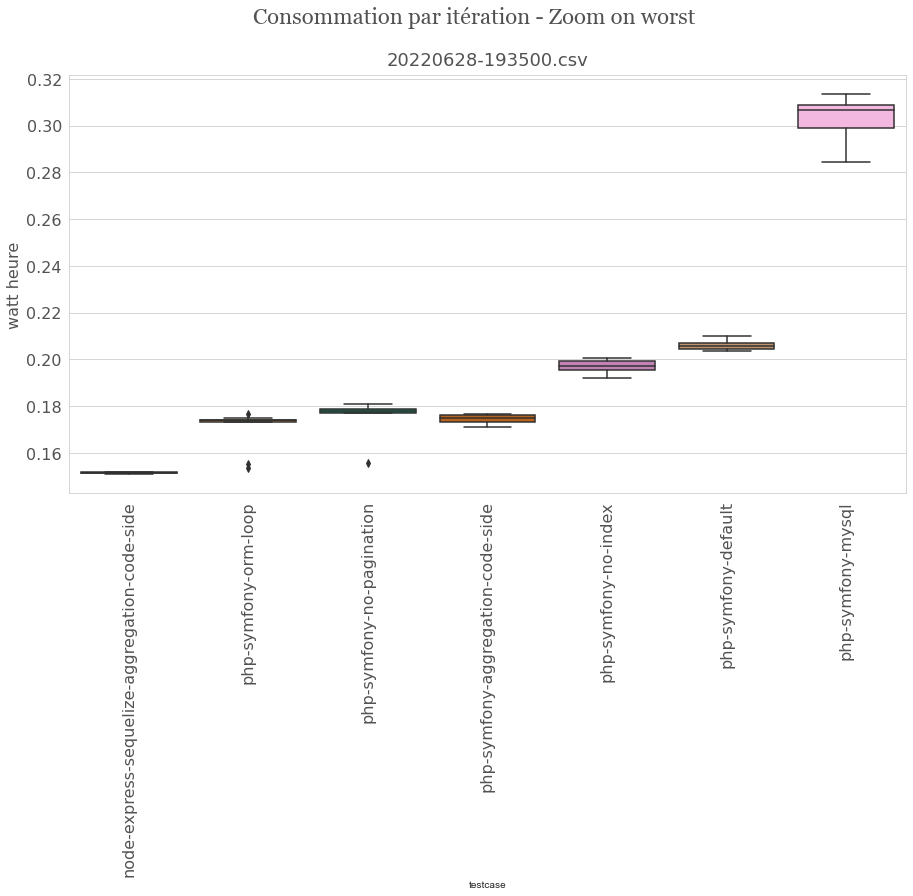

In [13]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'wh_by_iteration',palette='colorblind',fliersize=5, data = df[df['wh_by_iteration']>0.150].sort_values(['wh_by_iteration'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('watt heure', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Consommation par itération - Zoom on worst'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'boxplot-zoom-worst'
plt.savefig(filename+'.png', facecolor=facecolor)

## Performance

The higher the better.

The lower you need more servers to serve the same amount of users.

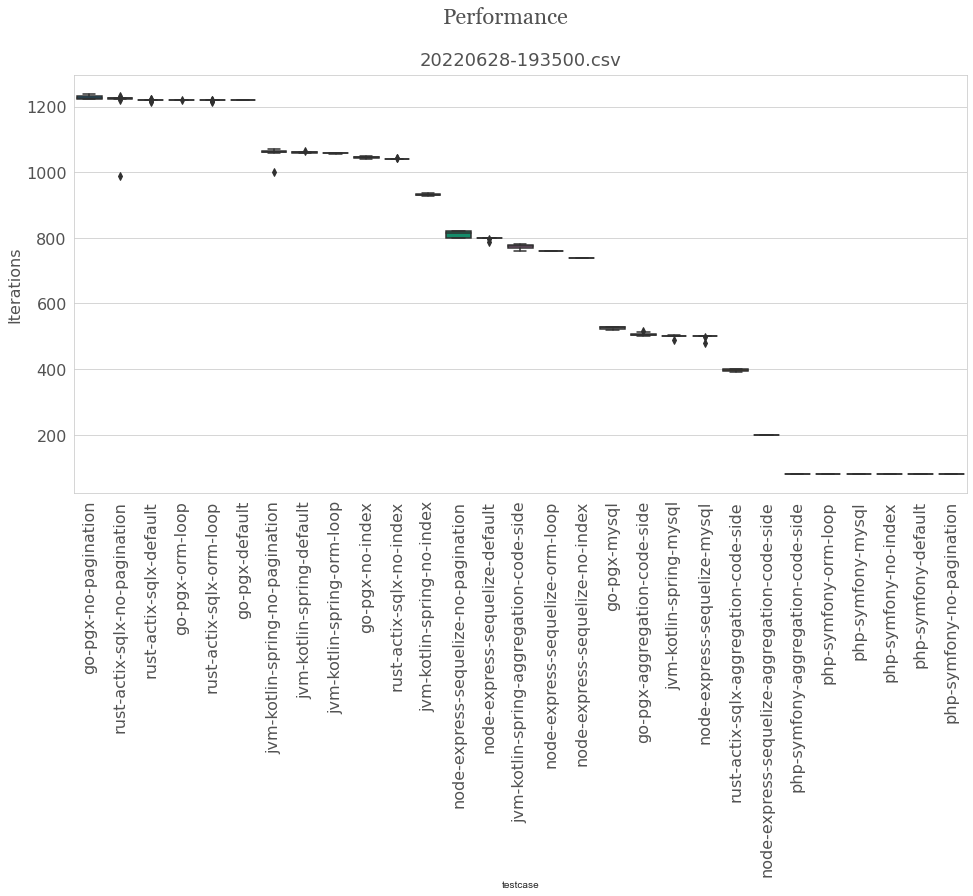

In [14]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(16, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'iterations',palette='colorblind',fliersize=5, data = df.sort_values(['iterations'], ascending=[0]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('Iterations', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Performance'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'boxplot-performance'
plt.savefig(filename+'.png', facecolor=facecolor)

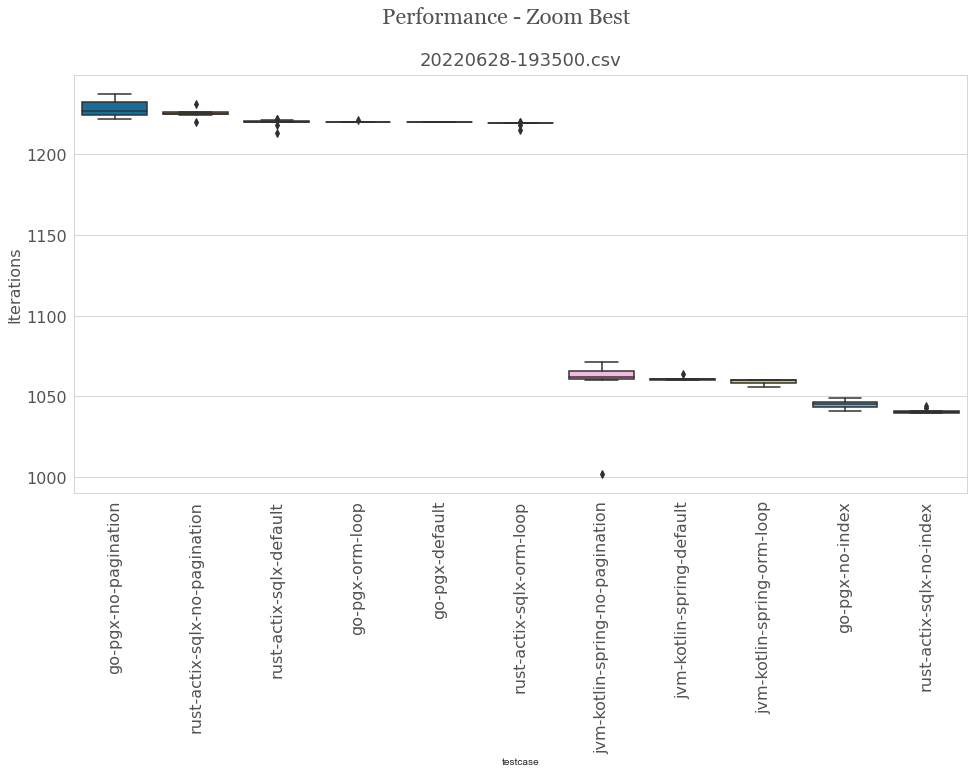

In [15]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(16, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'iterations',palette='colorblind',fliersize=5, data = df[df['iterations']>1000].sort_values(['iterations'], ascending=[0]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('Iterations', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Performance - Zoom Best'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'boxplot-performance-zoom-best'
plt.savefig(filename+'.png', facecolor=facecolor)

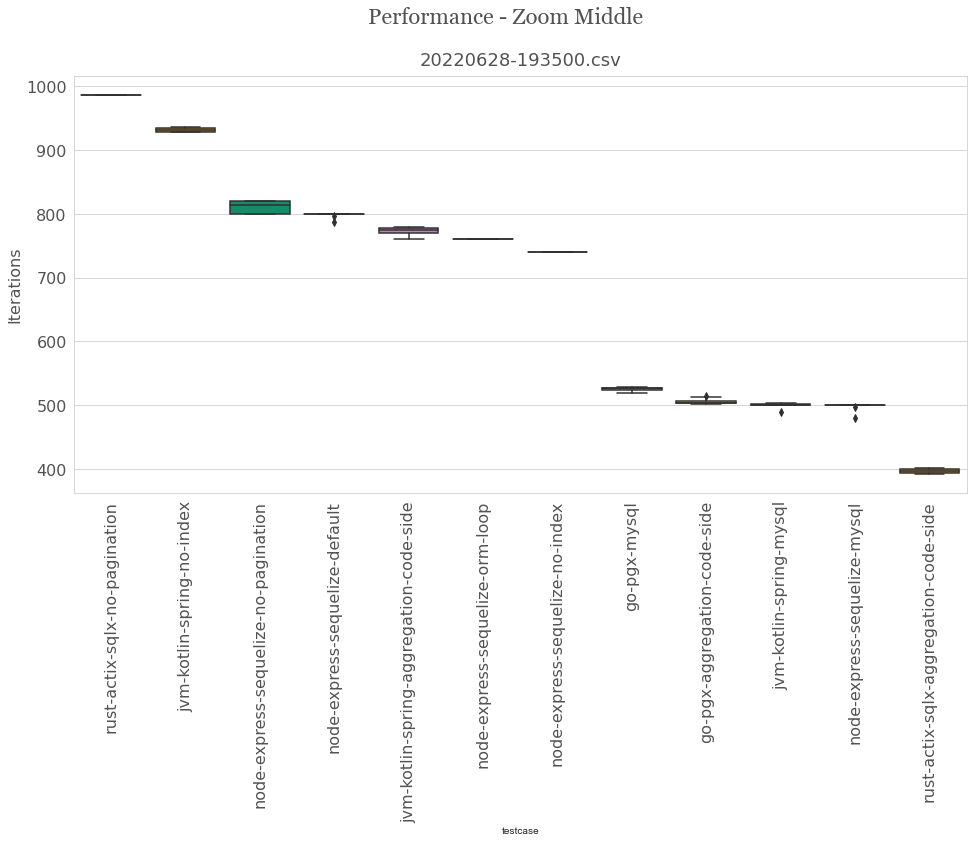

In [16]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(16, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'iterations',palette='colorblind',fliersize=5, data = df[(df['iterations']<1000) & (df['iterations']>200)].sort_values(['iterations'], ascending=[0]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('Iterations', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Performance - Zoom Middle'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'boxplot-performance-zoom-best'
plt.savefig(filename+'.png', facecolor=facecolor)

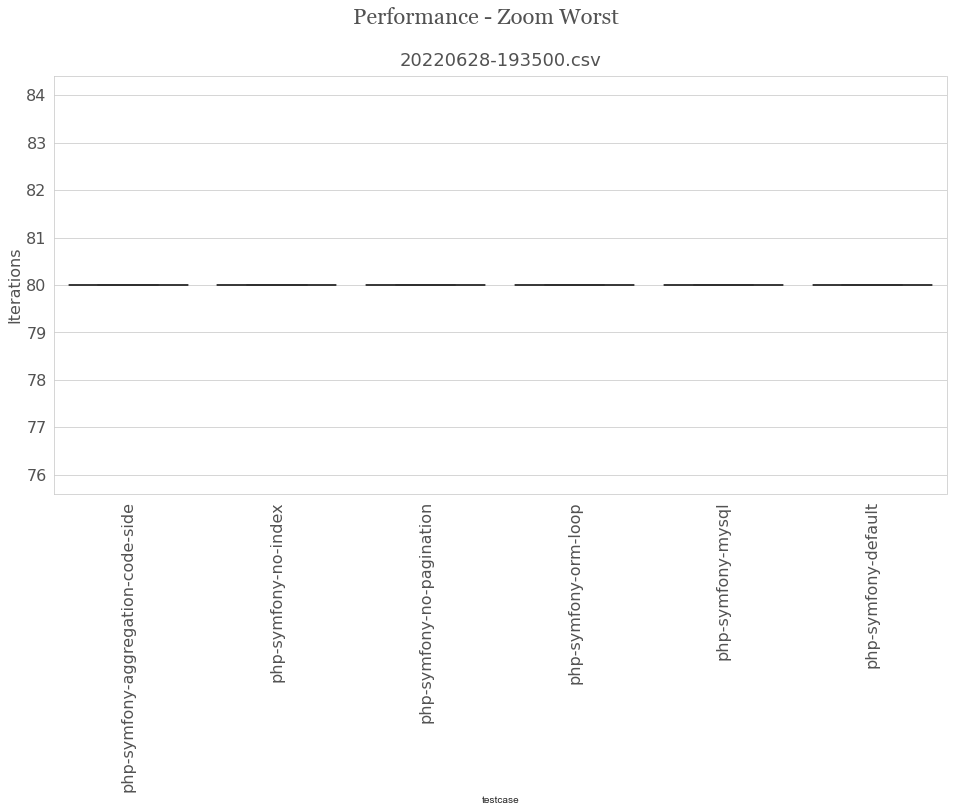

In [17]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(16, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'iterations',palette='colorblind',fliersize=5, data = df[df['iterations']<200].sort_values(['iterations'], ascending=[0]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('Iterations', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Performance - Zoom Worst'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'boxplot-performance-zoom-worst'
plt.savefig(filename+'.png', facecolor=facecolor)

## Server resource usage

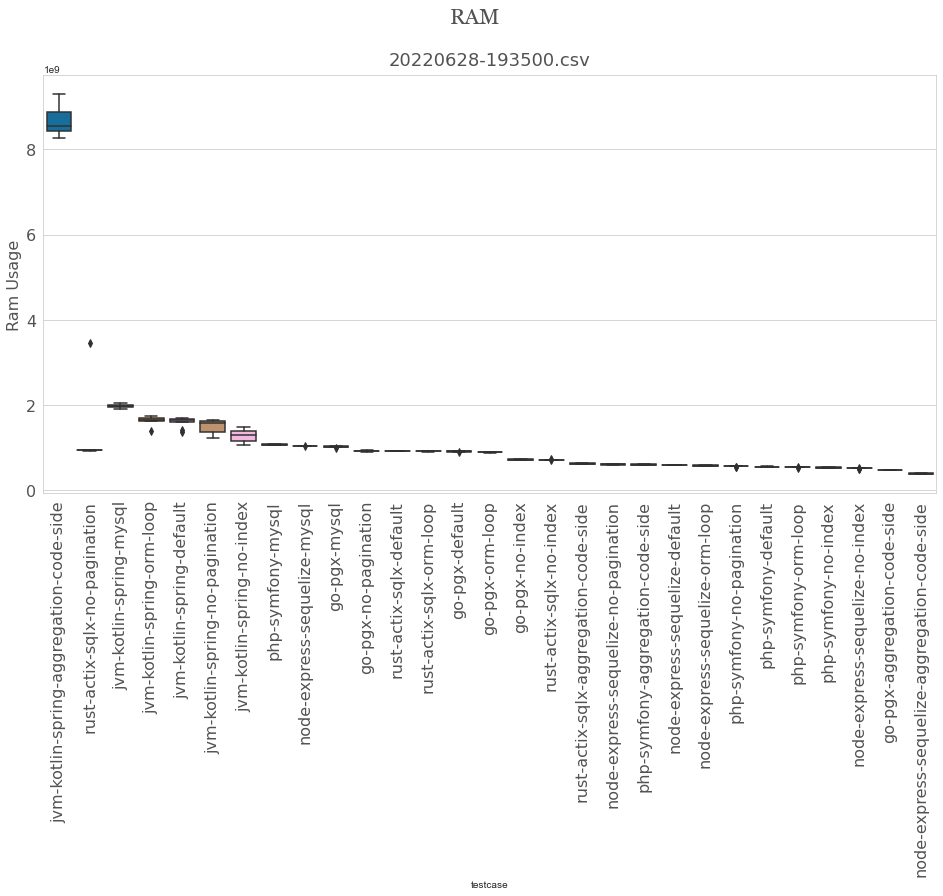

In [18]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(16, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'ram',palette='colorblind',fliersize=5, data = df.sort_values(['ram'], ascending=[0]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('Ram Usage', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'RAM'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'sns-boxplot'
plt.savefig(filename+'.png', facecolor=facecolor)

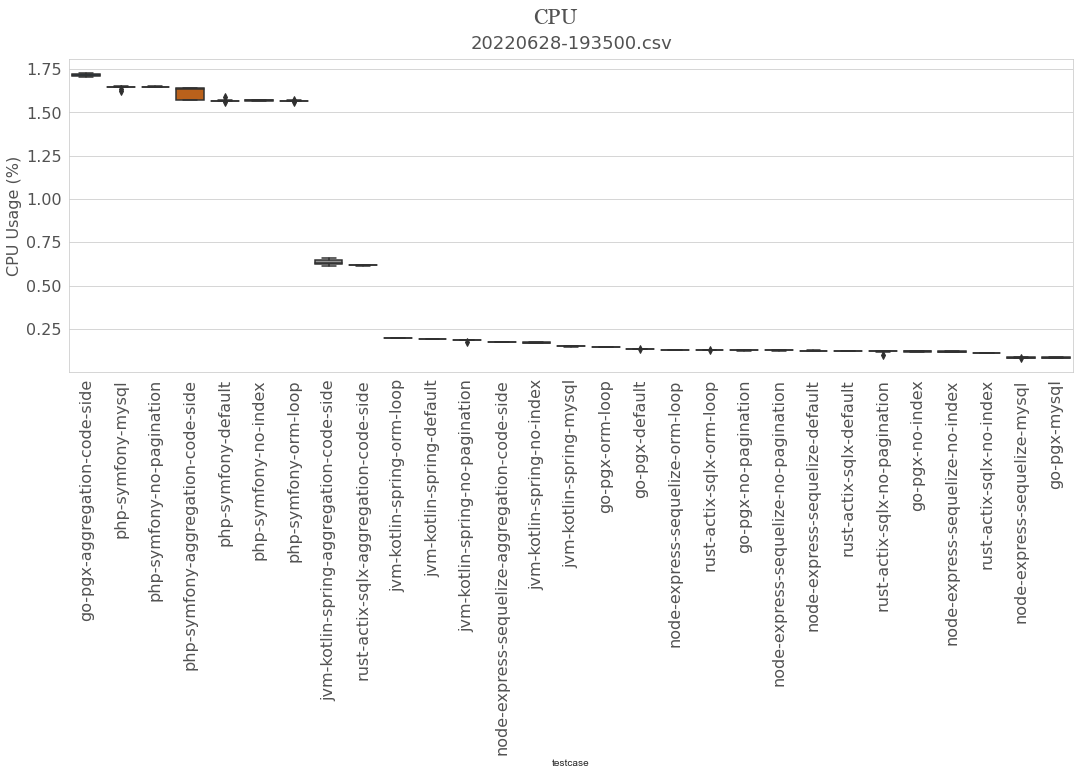

In [19]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(18, 6), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'cpu',palette='colorblind',fliersize=5, data = df.sort_values(['cpu'], ascending=[0]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('CPU Usage (%)', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'CPU'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'sns-boxplot'
plt.savefig(filename+'.png', facecolor=facecolor)

## Impact du design (conception, choix d'architecture)

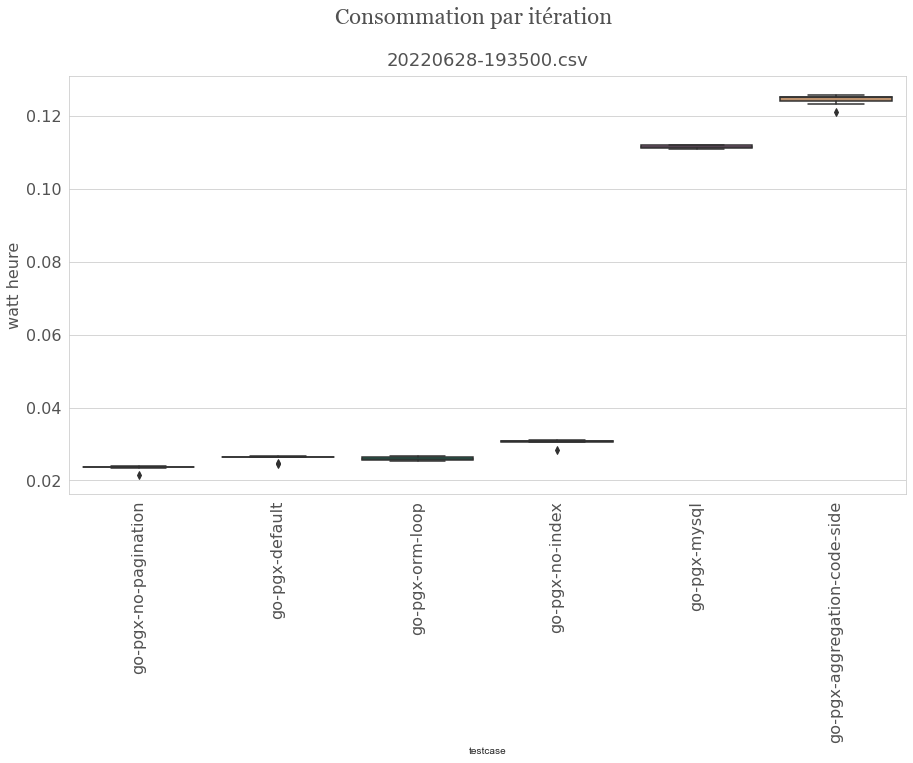

In [38]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(1,1,figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'wh_by_iteration',palette='colorblind',fliersize=5, data = df[df["service"]== "go-pgx"].sort_values(['wh_by_iteration'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('watt heure', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Consommation par itération'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'php-symfony-orm-loop'),
  Text(1, 0, 'php-symfony-no-pagination'),
  Text(2, 0, 'php-symfony-aggregation-code-side'),
  Text(3, 0, 'php-symfony-no-index'),
  Text(4, 0, 'php-symfony-default'),
  Text(5, 0, 'php-symfony-mysql')])

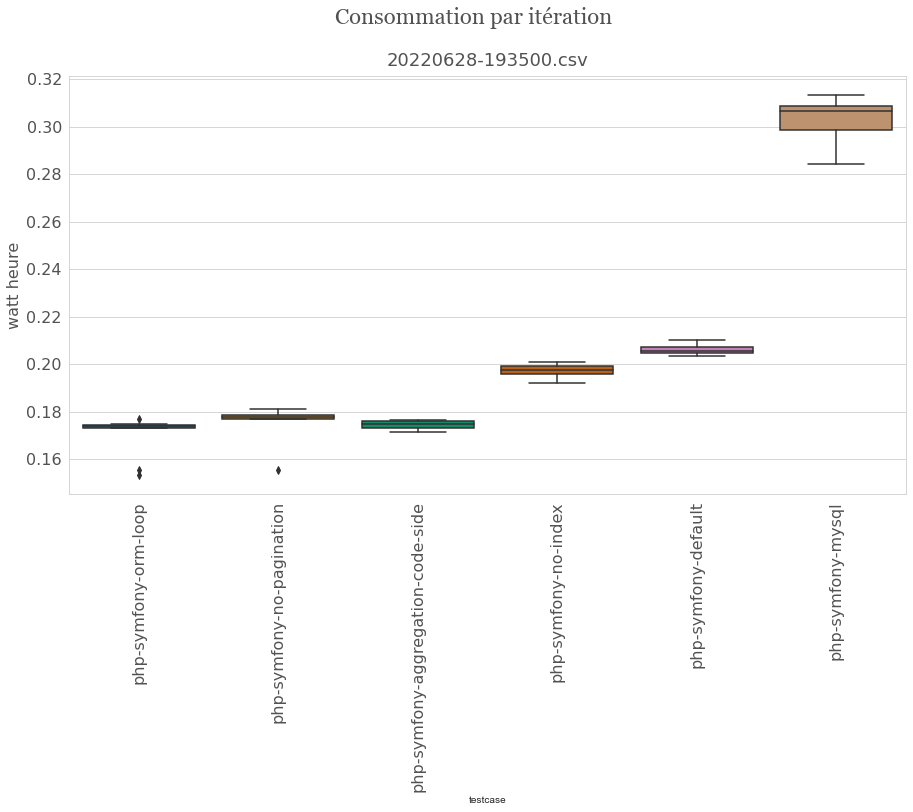

In [39]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(1,1,figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'wh_by_iteration',palette='colorblind',fliersize=5, data = df[df["service"]== "php-symfony"].sort_values(['wh_by_iteration'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('watt heure', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Consommation par itération'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)

In [57]:
dfagg=df.groupby(['service','use_case'])['wh_by_iteration','iterations'].agg(['median','std'])
dfagg.head()

/var/folders/88/fy93zccx2g34svmq50wm2nsm0000gn/T/ipykernel_15216/561935104.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfagg=df.groupby(['service','use_case'])['wh_by_iteration','iterations'].agg(['median','std'])


wh_by_iteration           iterations          
                                       median       std     median       std
service use_case                                                            
go-pgx  aggregation-code-side        0.125259  0.001500      504.0  4.581363
        default                      0.026494  0.000837     1220.0  0.000000
        mysql                        0.111584  0.000404      527.0  2.877113
        no-index                     0.030848  0.000791     1045.0  2.581989
        no-pagination                0.023724  0.000681     1226.5  5.300943

In [357]:
dfagg

wh_by_iteration            \
                                                      median       std   
service                use_case                                          
go-pgx                 aggregation-code-side        0.125259  0.001500   
                       default                      0.026494  0.000837   
                       mysql                        0.111584  0.000404   
                       no-index                     0.030848  0.000791   
                       no-pagination                0.023724  0.000681   
                       orm-loop                     0.025796  0.000430   
jvm-kotlin-spring      aggregation-code-side        0.092915  0.000749   
                       default                      0.054403  0.001323   
                       mysql                        0.126934  0.001621   
                       no-index                     0.061016  0.000767   
                       no-pagination                0.049667  0.000810   
                       orm-loop                     0.051713  0.000405   
node-express-sequelize aggregation-code-side        0.151371  0.000567   
                       default                      0.052229  0.000334   
                       mysql                        0.108068  0.002089   
                       no-index                     0.054967  0.000316   
                       no-pagination                0.044118  0.000384   
                       orm-loop                     0.050271  0.001434   
php-symfony            aggregation-code-side        0.174709  0.001985   
                       default                      0.205549  0.002157   
                       mysql                        0.306821  0.008855   
                       no-index                     0.197360  0.002585   
                       no-pagination                0.177884  0.007291   
                       orm-loop                     0.173959  0.008514   
rust-actix-sqlx        aggregation-code-side        0.137035  0.002033   
                       default                      0.027131  0.000180   
                       no-index                     0.030566  0.000375   
                       no-pagination                0.024569  0.000722   
                       orm-loop                     0.025099  0.000104   

                                             iterations             
                                                 median        std  
service                use_case                                     
go-pgx                 aggregation-code-side      504.0   4.581363  
                       default                   1220.0   0.000000  
                       mysql                      527.0   2.877113  
                       no-index                  1045.0   2.581989  
                       no-pagination             1226.5   5.300943  
                       orm-loop                  1220.0   0.316228  
jvm-kotlin-spring      aggregation-code-side      775.0   7.560129  
                       default                   1060.5   1.229273  
                       mysql                      500.0   3.725289  
                       no-index                   931.0   3.204164  
                       no-pagination             1062.0  19.948823  
                       orm-loop                  1060.0   1.663330  
node-express-sequelize aggregation-code-side      200.0   0.000000  
                       default                    800.0   3.864367  
                       mysql                      500.0   6.285786  
                       no-index                   740.0   0.000000  
                       no-pagination              814.0   9.870832  
                       orm-loop                   760.0   0.000000  
php-symfony            aggregation-code-side       80.0   0.000000  
                       default                     80.0   0.000000  
                       mysql                       80.0   0.000000  
                    

In [149]:
idx=pd.IndexSlice
default=dfagg.loc[idx[:, "default"],idx[:,'median']].rename(columns={'median':'median_default'})
default=default.droplevel('use_case')

default.head()

,wh_by_iteration,iterations
,median_default,median_default
service,,
go-pgx,0.026494,1220.0
jvm-kotlin-spring,0.054403,1060.5
node-express-sequelize,0.052229,800.0
php-symfony,0.205549,80.0
rust-actix-sqlx,0.027131,1220.0


In [221]:
dfjoined=dfagg.join(default)
dfjoined.head()

wh_by_iteration           iterations            \
                                       median       std     median       std   
service use_case                                                               
go-pgx  aggregation-code-side        0.125259  0.001500      504.0  4.581363   
        default                      0.026494  0.000837     1220.0  0.000000   
        mysql                        0.111584  0.000404      527.0  2.877113   
        no-index                     0.030848  0.000791     1045.0  2.581989   
        no-pagination                0.023724  0.000681     1226.5  5.300943   

                              wh_by_iteration     iterations  
                               median_default median_default  
service use_case                                              
go-pgx  aggregation-code-side        0.026494         1220.0  
        default                      0.026494         1220.0  
        mysql                        0.026494         1220.0  
        no-index                     0.026494         1220.0  
        no-pagination                0.026494         1220.0

In [222]:
dfjoined_s1=dfjoined.drop(index='default',level=1)
dfjoined_s1.head()

wh_by_iteration           iterations            \
                                       median       std     median       std   
service use_case                                                               
go-pgx  aggregation-code-side        0.125259  0.001500      504.0  4.581363   
        mysql                        0.111584  0.000404      527.0  2.877113   
        no-index                     0.030848  0.000791     1045.0  2.581989   
        no-pagination                0.023724  0.000681     1226.5  5.300943   
        orm-loop                     0.025796  0.000430     1220.0  0.316228   

                              wh_by_iteration     iterations  
                               median_default median_default  
service use_case                                              
go-pgx  aggregation-code-side        0.026494         1220.0  
        mysql                        0.026494         1220.0  
        no-index                     0.026494         1220.0  
        no-pagination                0.026494         1220.0  
        orm-loop                     0.026494         1220.0

In [259]:
a=dfjoined_s1.loc[:,pd.IndexSlice[:,'median']].sub(dfjoined_s1.loc[:,pd.IndexSlice[:,'median_default']].values, 1).abs().rename(columns={'median':'sub'})
dfjoined_s2=dfjoined_s1.join(a)

In [260]:
b=dfjoined_s2.loc[:,pd.IndexSlice[:,'sub']].div(dfjoined_s2.loc[:,pd.IndexSlice[:,'median_default']].values, 1).mul(100).round().rename(columns={'sub':'sub_percent'})
dfjoined_s3=dfjoined_s2.join(b)

In [261]:
dfjoined_s3.head()

wh_by_iteration           iterations            \
                                       median       std     median       std   
service use_case                                                               
go-pgx  aggregation-code-side        0.125259  0.001500      504.0  4.581363   
        mysql                        0.111584  0.000404      527.0  2.877113   
        no-index                     0.030848  0.000791     1045.0  2.581989   
        no-pagination                0.023724  0.000681     1226.5  5.300943   
        orm-loop                     0.025796  0.000430     1220.0  0.316228   

                              wh_by_iteration     iterations wh_by_iteration  \
                               median_default median_default             sub   
service use_case                                                               
go-pgx  aggregation-code-side        0.026494         1220.0        0.098765   
        mysql                        0.026494         1220.0        0.085090   
        no-index                     0.026494         1220.0        0.004354   
        no-pagination                0.026494         1220.0        0.002770   
        orm-loop                     0.026494         1220.0        0.000698   

                              iterations wh_by_iteration  iterations  
                                     sub     sub_percent sub_percent  
service use_case                                                      
go-pgx  aggregation-code-side      716.0           373.0        59.0  
        mysql                      693.0           321.0        57.0  
        no-index                   175.0            16.0        14.0  
        no-pagination                6.5            10.0         1.0  
        orm-loop                     0.0             3.0         0.0

In [263]:
result=dfjoined_s3.reset_index()
result.columns = result.columns.map('-'.join)
result.head()

,service-,use_case-,wh_by_iteration-median,wh_by_iteration-std,iterations-median,iterations-std,wh_by_iteration-median_default,iterations-median_default,wh_by_iteration-sub,iterations-sub,wh_by_iteration-sub_percent,iterations-sub_percent
0,go-pgx,aggregation-code-side,0.125259,0.001500,504.0,4.581363,0.026494,1220.0,0.098765,716.0,373.0,59.0
1,go-pgx,mysql,0.111584,0.000404,527.0,2.877113,0.026494,1220.0,0.085090,693.0,321.0,57.0
2,go-pgx,no-index,0.030848,0.000791,1045.0,2.581989,0.026494,1220.0,0.004354,175.0,16.0,14.0
3,go-pgx,no-pagination,0.023724,0.000681,1226.5,5.300943,0.026494,1220.0,0.002770,6.5,10.0,1.0
4,go-pgx,orm-loop,0.025796,0.000430,1220.0,0.316228,0.026494,1220.0,0.000698,0.0,3.0,0.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'orm-loop'),
  Text(1, 0, 'no-pagination'),
  Text(2, 0, 'no-index'),
  Text(3, 0, 'mysql'),
  Text(4, 0, 'aggregation-code-side')])

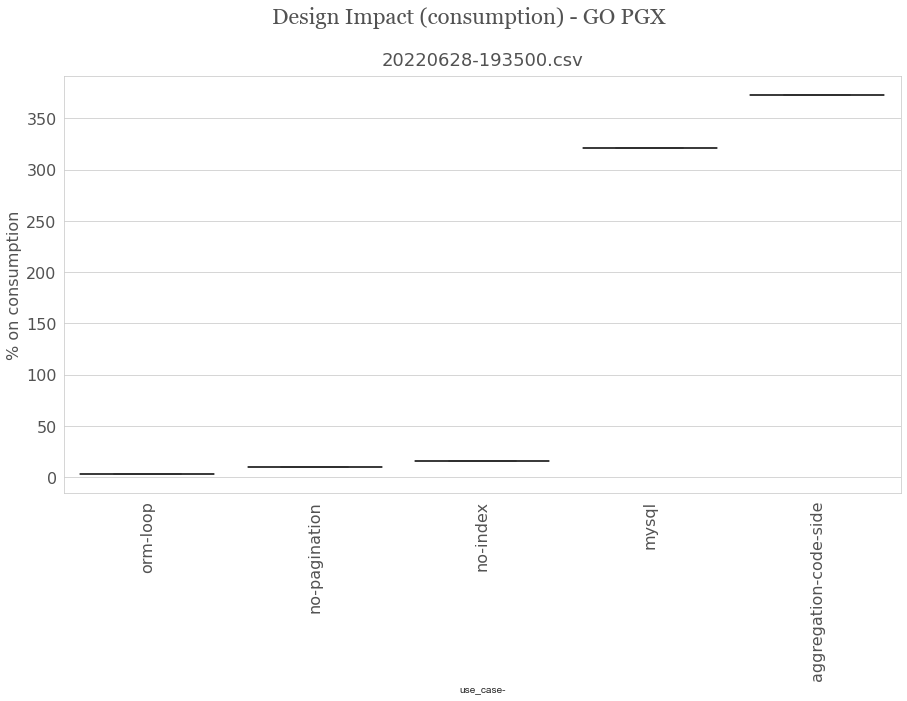

In [326]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(1,1,figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'use_case-', y = 'wh_by_iteration-sub_percent',palette='colorblind',fliersize=5, data = result[result["service-"]== "go-pgx"].sort_values(['wh_by_iteration-sub_percent'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('% on consumption', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Design Impact (consumption) - GO PGX'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'orm-loop'),
  Text(1, 0, 'no-pagination'),
  Text(2, 0, 'no-index'),
  Text(3, 0, 'mysql'),
  Text(4, 0, 'aggregation-code-side')])

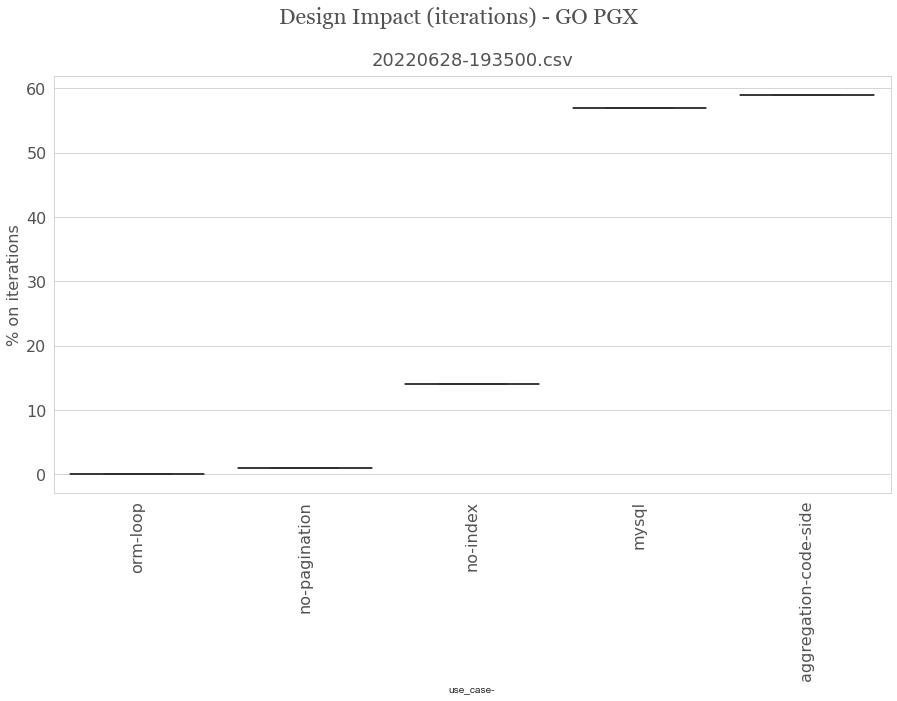

In [325]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(1,1,figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'use_case-', y = 'iterations-sub_percent',palette='colorblind',fliersize=5, data = result[result["service-"]== "go-pgx"].sort_values(['iterations-sub_percent'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('% on iterations', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Design Impact (iterations) - GO PGX'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'no-index'),
  Text(1, 0, 'no-pagination'),
  Text(2, 0, 'aggregation-code-side'),
  Text(3, 0, 'orm-loop'),
  Text(4, 0, 'mysql')])

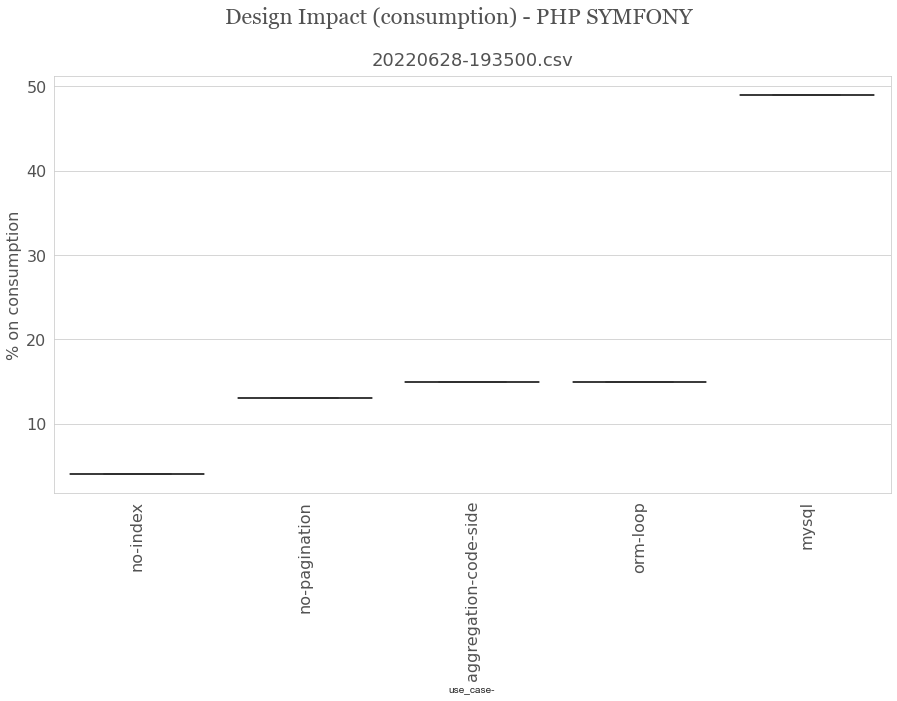

In [320]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(1,1,figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'use_case-', y = 'wh_by_iteration-sub_percent',palette='colorblind',fliersize=5, data = result[result["service-"]== "php-symfony"].sort_values(['wh_by_iteration-sub_percent'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('% on consumption', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Design Impact (consumption) - PHP SYMFONY'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'orm-loop'),
  Text(1, 0, 'no-pagination'),
  Text(2, 0, 'no-index'),
  Text(3, 0, 'aggregation-code-side'),
  Text(4, 0, 'mysql')])

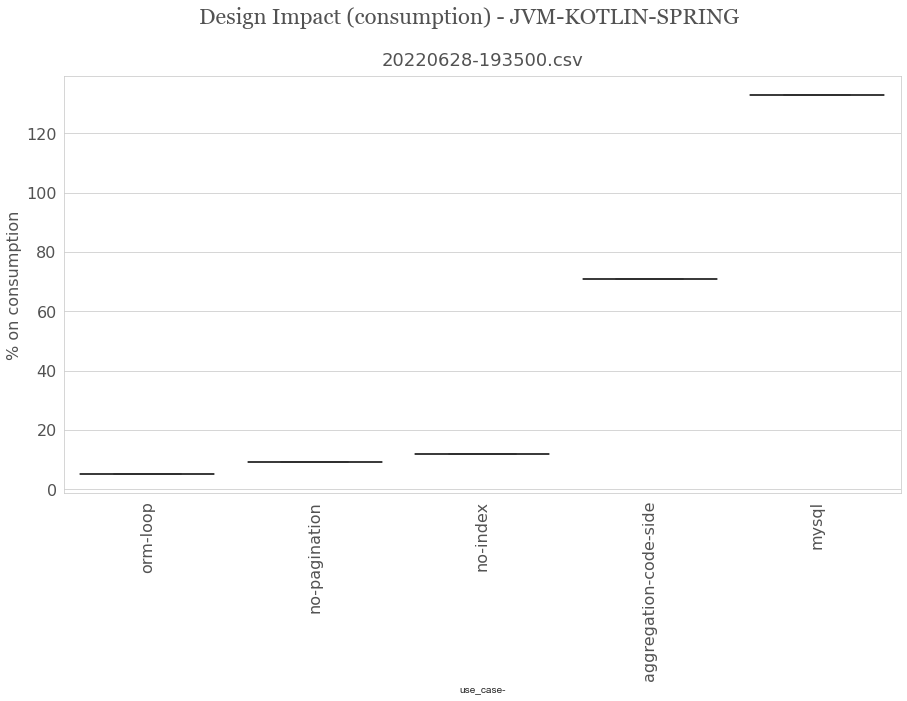

In [321]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(1,1,figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'use_case-', y = 'wh_by_iteration-sub_percent',palette='colorblind',fliersize=5, data = result[result["service-"]== "jvm-kotlin-spring"].sort_values(['wh_by_iteration-sub_percent'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('% on consumption', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Design Impact (consumption) - JVM-KOTLIN-SPRING'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'orm-loop'),
  Text(1, 0, 'no-index'),
  Text(2, 0, 'no-pagination'),
  Text(3, 0, 'mysql'),
  Text(4, 0, 'aggregation-code-side')])

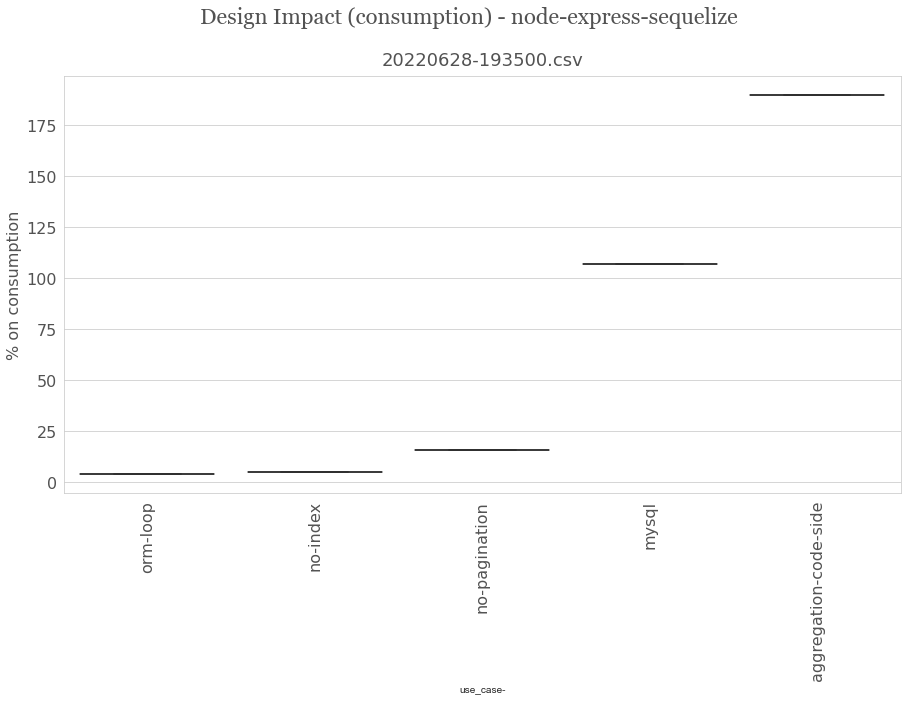

In [323]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(1,1,figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'use_case-', y = 'wh_by_iteration-sub_percent',palette='colorblind',fliersize=5, data = result[result["service-"]== "node-express-sequelize"].sort_values(['wh_by_iteration-sub_percent'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('% on consumption', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Design Impact (consumption) - node-express-sequelize'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'orm-loop'),
  Text(1, 0, 'no-pagination'),
  Text(2, 0, 'no-index'),
  Text(3, 0, 'aggregation-code-side')])

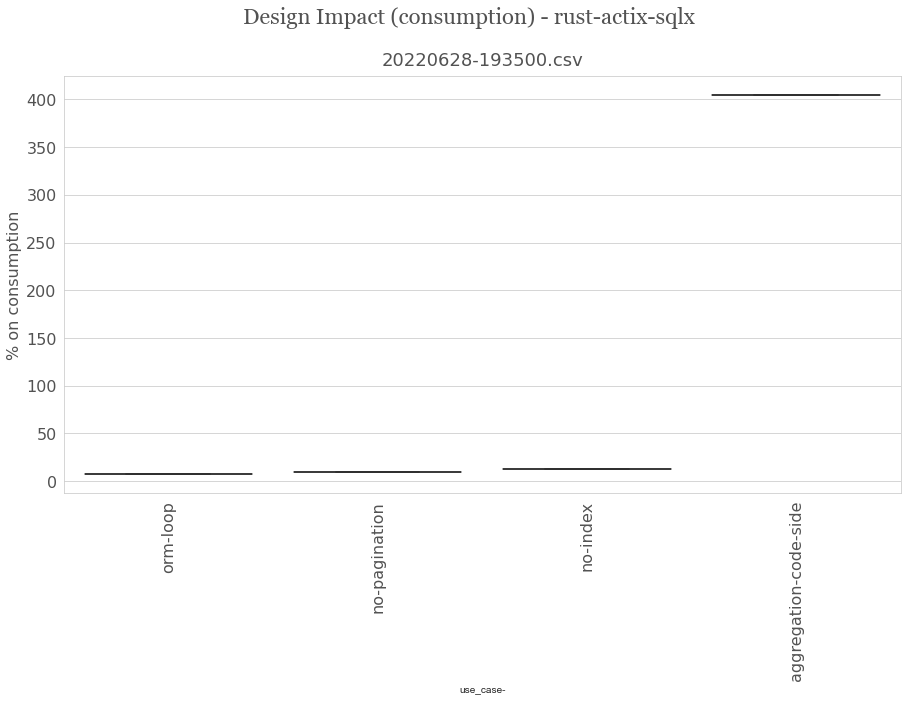

In [324]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(1,1,figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'use_case-', y = 'wh_by_iteration-sub_percent',palette='colorblind',fliersize=5, data = result[result["service-"]== "rust-actix-sqlx"].sort_values(['wh_by_iteration-sub_percent'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('% on consumption', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Design Impact (consumption) - rust-actix-sqlx'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)

In [338]:
dfglobal=result.groupby(['use_case-'])['wh_by_iteration-sub_percent','iterations-sub_percent'].agg(['median','std'])

/var/folders/88/fy93zccx2g34svmq50wm2nsm0000gn/T/ipykernel_15216/3885137573.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfglobal=result.groupby(['use_case-'])['wh_by_iteration-sub_percent','iterations-sub_percent'].agg(['median','std'])


In [355]:
dfglobal1=dfglobal.reset_index()
dfglobal1.columns = dfglobal1.columns.map(''.join)
dfglobal1["consolidated"]=dfglobal1["wh_by_iteration-sub_percentmedian"]*0.35+dfglobal1["iterations-sub_percentmedian"]*0.65
dfglobal1


,use_case-,wh_by_iteration-sub_percentmedian,wh_by_iteration-sub_percentstd,iterations-sub_percentmedian,iterations-sub_percentstd,consolidated
0,aggregation-code-side,190.0,174.883390,59.0,31.507142,104.850
1,mysql,120.0,117.693104,45.5,25.987176,71.575
2,no-index,12.0,5.244044,12.0,6.099180,12.000
3,no-pagination,10.0,3.049590,0.0,0.894427,3.500
4,orm-loop,5.0,4.816638,0.0,2.236068,1.750


<AxesSubplot:xlabel='use_case-'>

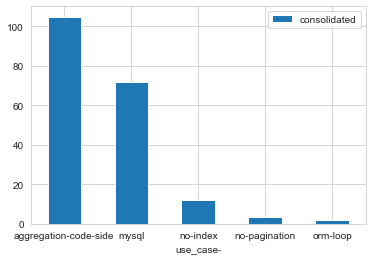

In [356]:
dfglobal1.plot.bar(x="use_case-",y="consolidated", rot=0)

In [352]:
dfglobal1["consolidated"]

0    98.30
1    67.85
2    12.00
3     3.00
4     1.50
Name: consolidated, dtype: float64

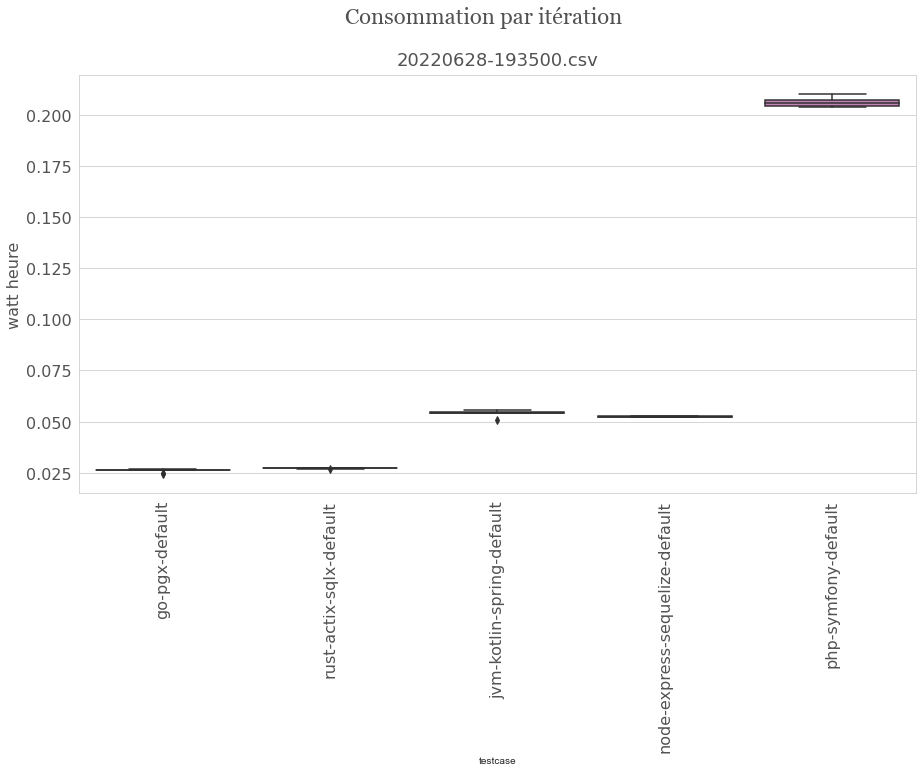

In [358]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(1,1,figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'wh_by_iteration',palette='colorblind',fliersize=5, data = df[df['use_case']=='default'].sort_values(['wh_by_iteration'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('watt heure', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Consommation par itération'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)


filename = 'boxplot-wh-filtered'
plt.savefig(filename+'.png', facecolor=facecolor)

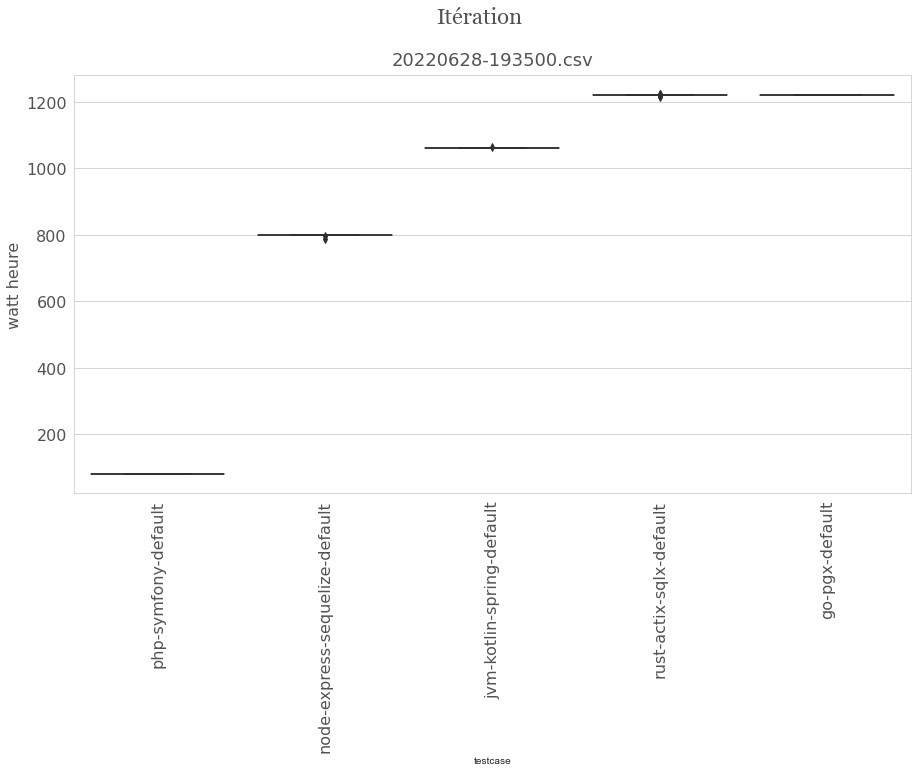

In [359]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(1,1,figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'iterations',palette='colorblind',fliersize=5, data = df[df['use_case']=='default'].sort_values(['iterations'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('Iterations', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Performance'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)


filename = 'boxplot-wh-filtered'
plt.savefig(filename+'.png', facecolor=facecolor)